### Tasks
#### Load the dataset and identify the relevant columns.
#### Use:
#### Engine size as the input feature
#### Car price as the output variable
#### Visualize the relationship between engine size and price.
#### Build a predictive model to estimate car price based on engine size.
#### Predict the price for a car with:
#### Engine size = 200
#### Increase the flexibility of your model and observe how the curve changes.
#### Compare predictions from:
#### a simple straight-line model
#### a curved model
#### Analyze which model:
#### captures the trend better
#### gives more realistic predictions
#### Evaluate prediction errors and interpret them in business terms.
#### Answer the following:
#### Why does a straight-line model fail here?
#### What risk occurs if the curve becomes too flexible?
#### Which model would you recommend for production and why?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv('carPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
X = data[['enginesize']].values
y = data['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("MSE (Simple Linear Regression):", mse_linear)


MSE (Simple Linear Regression): 15465458.96590847


In [8]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("MSE (Polynomial Regression):", mse_poly)


MSE (Polynomial Regression): 11649790.194971029


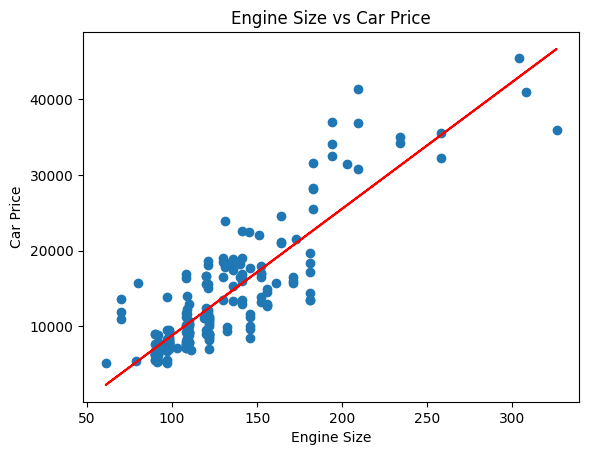

In [9]:
model = LinearRegression()
model.fit(X, y)

plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()

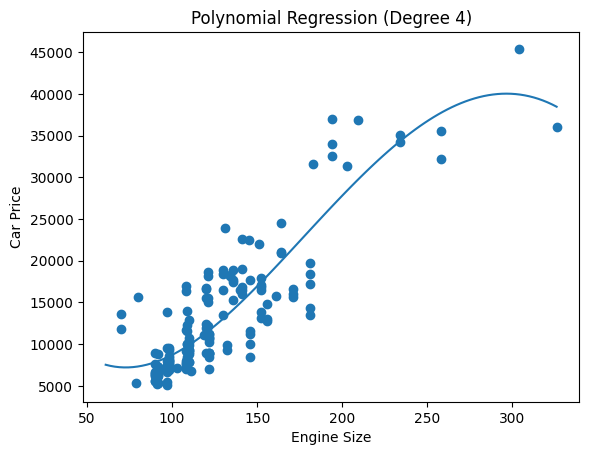

In [10]:
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_grid, poly_reg.predict(X_grid_poly))
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("CarPrice_Assignment.csv")

X = data[['enginesize']].values
y = data['price'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------- Simple Linear Regression --------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# -------- Polynomial Regression (Degree = 4) --------
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("MSE (Linear Model):", mse_linear)
print("MSE (Polynomial Model - Degree 4):", mse_poly)


MSE (Linear Model): 15465458.96590847
MSE (Polynomial Model - Degree 4): 11649790.194971029


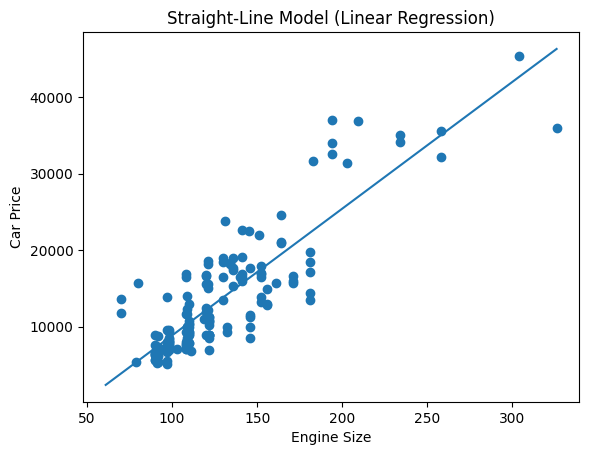

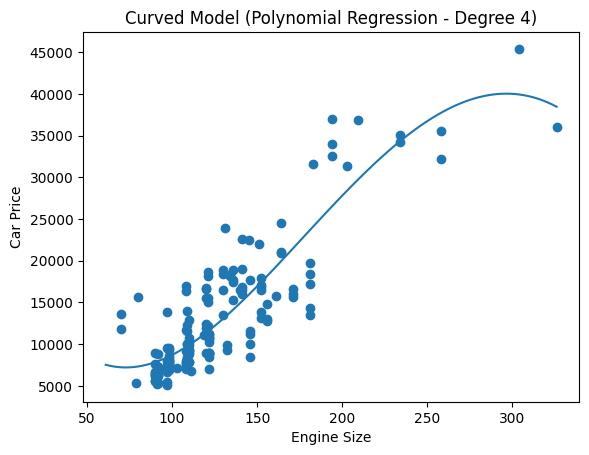

In [12]:
# Smooth grid for plotting
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Linear plot
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_grid, lin_reg.predict(X_grid))
plt.title("Straight-Line Model (Linear Regression)")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.show()

# Polynomial plot
X_grid_poly = poly.transform(X_grid)

plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_grid, poly_reg.predict(X_grid_poly))
plt.title("Curved Model (Polynomial Regression - Degree 4)")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.show()


In [13]:
engine_size=[[200]]
engine_size_poly=poly.transform(engine_size)
prediction=poly_reg.predict(engine_size_poly)
print(prediction)

[27806.11187674]


In [14]:
prediction_linear=lin_reg.predict(engine_size)
print(prediction_linear)

[25427.14744504]


In [15]:
# R2 Score for Training Data
y_pred_train = model.predict(X_train)

print(r2_score(y_train,y_pred_train))

0.750597282039292


In [16]:
# R2 Score for Testing Data
y_pred_test = model.predict(X_test)

print(r2_score(y_test,y_pred_test))

0.8048496655399958


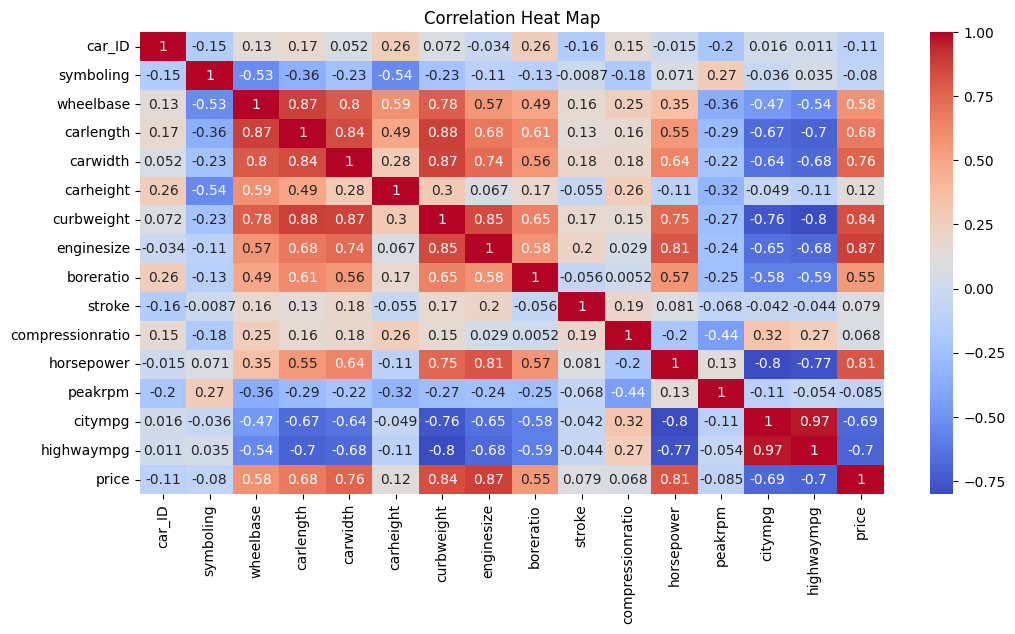

In [17]:
# feature - target relationship
numeric_data = data.select_dtypes(include=['int64', 'float64'])
#corr_matrix = np.abs(numeric_data.corr()) # to identify weak, strong and moderate features we use np.abs() 
# or else we dont use np.abs()
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heat Map")
plt.show()


#### Strong Positive: 0.7 to 1
#### Moderate Positive: 0.3 to 0.7
#### Weak Positive : 0 to 0.3
#### No correlation: 0(-0.1 to 0.1)
#### Weak Negative: -0.3 to 0
#### Moderate Negative: -0.7 to -0.3
#### Strong Negative: -1.0 to -0.7

### Feature to price relationship
1. CAR_ID: Weak Negative
2. Symboling: Weak Negative
3. Wheelbase: Moderate Positive
4. carlength: Moderate Positive
5. carwidth: Strong Positive
6. carheight: Weak Positive
7. curbweight: Strong Positive
8. enginesize: Strong positive
9. boreratio: Moderate Positive
10. stroke: Weak Positive
11. compressionratio: weak positive
12. horsepower: strong positive
13. peakrpm: Weak negative
14. citympg: Moderate negative
14. highwaympg: Strong Negative

### Near to Zero " < 0.1 "
#### 1 Car Id
#### 2 Symbolling
#### 3 stroke
#### 4 compression-ratio
#### 5 peak-rpm
#### 6 city mpg
#### 7 highway-mpg


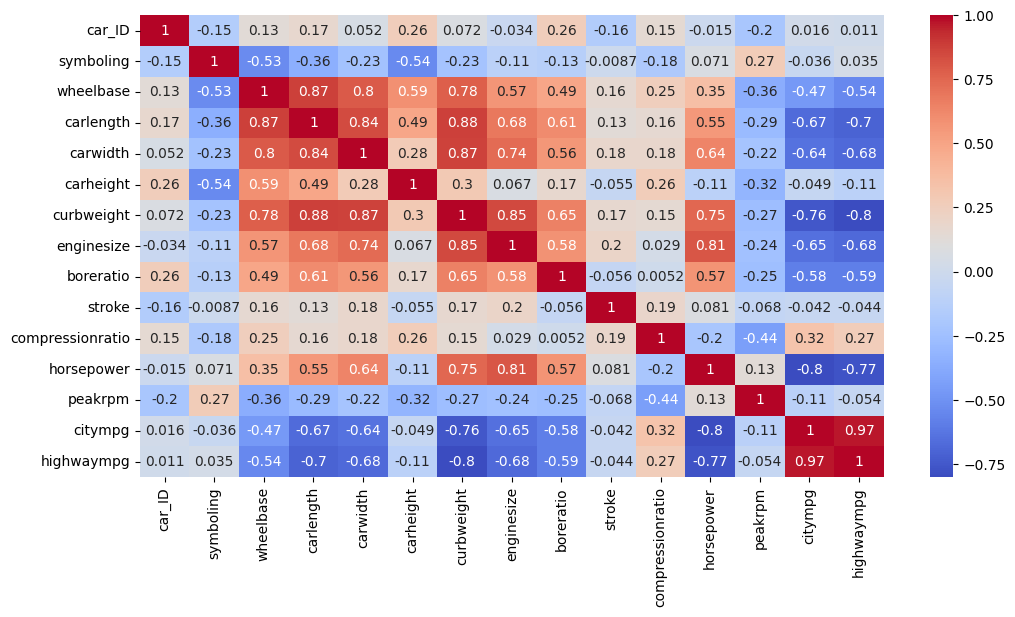

In [18]:
X=data.drop('price',axis=1)
 
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
 

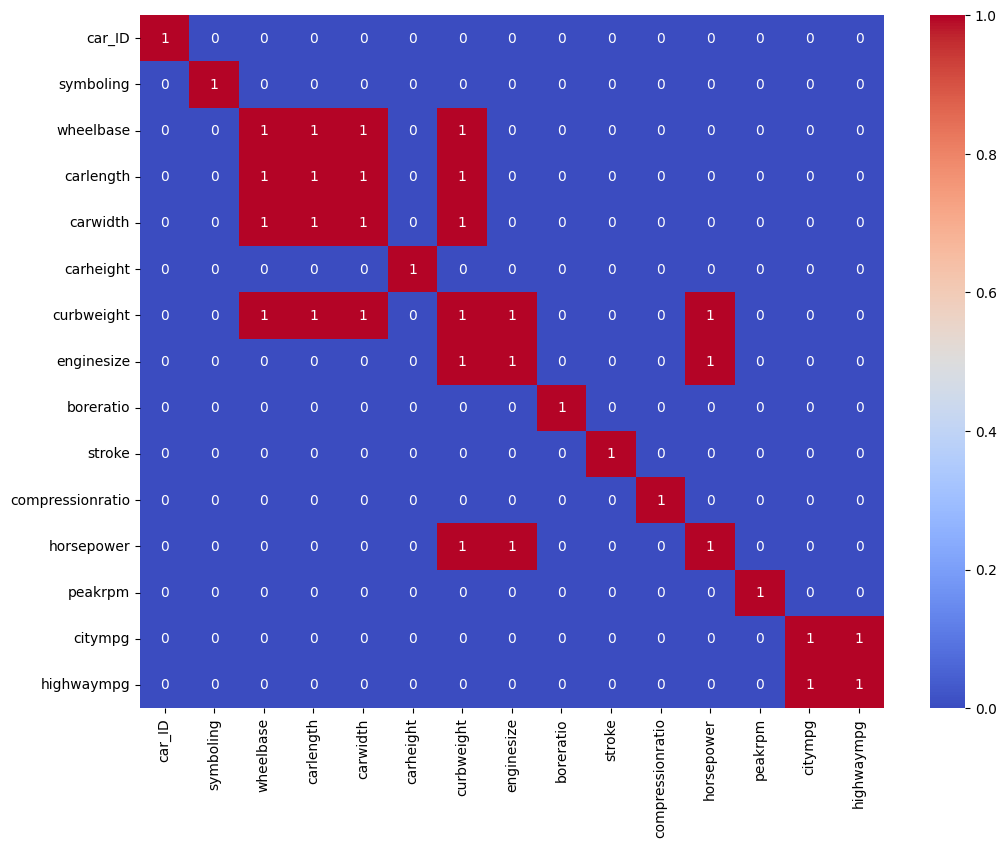

In [19]:
# feature to feature relationship which is > 0.75 (multi collinearity)
plt.figure(figsize=(12,9))
sns.heatmap(X.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [20]:
# feature to feature relationship which is > 0.75 and < -0.75 (multi collinearity) without same y-y columns
# 1. wheelbase - carlength
# 2. wheelbase - carwidth
# 3. wheelbase - curbweight
# 4. carlength - carwidth
# 5. carlength - curbweight
# 6. carwidth - curbweight
# 7. curbweight - enginesize
# 8. curbweight - horsepower
# 9. enginesize - horsepower
# 10. citympg - highwaympg

In [21]:
# this strategy is to prevent overfitting (regularization)( giving less importance to some features and giving higher importance to some features)

In [22]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Find feature-feature correlations > 0.75 (excluding self-correlation)
high_corr_pairs = (
    corr_matrix.abs()
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter > 0.75
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.75]

print(high_corr_pairs)


      Feature_1   Feature_2  Correlation
29    wheelbase   carlength     0.874587
30    wheelbase    carwidth     0.795144
32    wheelbase  curbweight     0.776386
42    carlength    carwidth     0.841118
44    carlength  curbweight     0.877728
55     carwidth  curbweight     0.867032
64     carwidth       price     0.759325
75   curbweight  enginesize     0.850594
79   curbweight  horsepower     0.750739
81   curbweight     citympg     0.757414
82   curbweight  highwaympg     0.797465
83   curbweight       price     0.835305
87   enginesize  horsepower     0.809769
91   enginesize       price     0.874145
111  horsepower     citympg     0.801456
112  horsepower  highwaympg     0.770544
113  horsepower       price     0.808139
117     citympg  highwaympg     0.971337


In [23]:
# Correlation with target
target = 'price'

target_corr = numeric_df.corr()[target].abs().sort_values(ascending=False)
print(target_corr)


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64


In [24]:
# Decide which feature to drop
# Suppose enginesize and horsepower are highly correlated
# If enginesize has higher correlation with price → keep it

columns_to_drop = ['horsepower']  # example
df_reduced = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)


Dropped columns: ['horsepower']


In [25]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.arange(0.1, 10, 0.05)
model = RidgeCV(alphas=alphas)


In [26]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# 1. Keep only numeric columns
df_numeric = df_reduced.select_dtypes(include=['int64', 'float64'])

X = df_numeric.drop(columns=['price'])
y = df_numeric['price']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (MANDATORY for Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define alpha values
alphas = np.arange(0.1, 10, 0.05)

# 5. Train RidgeCV model
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)

# 6. Predictions
y_pred = ridge_cv.predict(X_test_scaled)

# 7. Evaluation
print("Best Alpha:", ridge_cv.alpha_)
print("RidgeCV R² Score:", r2_score(y_test, y_pred))


Best Alpha: 5.700000000000001
RidgeCV R² Score: 0.8383276245740872


In [28]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 6.700000000000002
best score:  0.8355746141727073


In [29]:
from sklearn.linear_model import LassoCV
import numpy as np
model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8367147276432912
